In [1]:
# Q2. Perform the following preprocessing tasks on the dirty_iris dataset.


In [2]:
import numpy as np
import pandas as pd 
df = pd.read_csv("dirty_iris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,140.000000,133.000000,131.000000,138.0
mean,6.559286,3.390977,4.449962,inf
std,6.800940,3.315310,5.769299,NaN
min,0.000000,-3.000000,0.000000,0.1
25%,5.100000,2.800000,1.600000,0.3
50%,5.750000,3.000000,4.500000,1.3
75%,6.400000,3.300000,5.100000,1.8
max,73.000000,30.000000,63.000000,inf


In [5]:
null_values = df.isna().sum().sum()
print("Total null values :")
null_values

Total null values :


58

In [7]:
integer_types = df[["SepalLength","SepalWidth","PetalLength","PetalWidth"]]
inf_values = np.isinf(integer_types).values.sum()
print("Total inf values :")
inf_values

Total inf values :


1

In [8]:
missing_values=(df == "?").sum().sum()
print("Total missing values :")
missing_values

Total missing values :


0

In [9]:
# i) Calculate the number and percentage of observations that are complete.

new_df = df.dropna(thresh=5)
print(new_df)
print("No. of observations that are complete : ", new_df.shape )
per=len(new_df)/len(df)*100
print("Percentage of observations that are complete : ", per , "%")


     SepalLength  SepalWidth  PetalLength  PetalWidth     Species
0            6.4         3.2          4.5         1.5  versicolor
1            6.3         3.3          6.0         2.5   virginica
3            5.0         3.4          1.6         0.4      setosa
4            5.7         2.6          3.5         1.0  versicolor
7            5.9         3.0          5.1         1.8   virginica
..           ...         ...          ...         ...         ...
143          6.3         2.9          5.6         1.8   virginica
144          5.7         2.5          5.0         2.0   virginica
145          6.7         3.1          5.6         2.4   virginica
146          5.6         3.0          4.5         1.5  versicolor
147          5.2         3.5          1.5         0.2      setosa

[96 rows x 5 columns]
No. of observations that are complete :  (96, 5)
Percentage of observations that are complete :  64.0 %


In [10]:
# ii) Replace all the special values in data with NA.

df.replace(["NA","inf"], np.nan)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor
...,...,...,...,...,...
145,6.7,3.1,5.6,2.4,virginica
146,5.6,3.0,4.5,1.5,versicolor
147,5.2,3.5,1.5,0.2,setosa
148,6.4,3.1,NaN,1.8,virginica


In [11]:
# iii) Define these rules
  # 1. Species should be one of the following values: setosa, versicolor or virginica.

R1 = df["Species"].apply(lambda x: True if x == "setosa" or x == "versicolor" or x == "virginica" else False)
R1

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: Species, Length: 150, dtype: bool

In [12]:
  # 2. All measured numerical properties of an iris should be positive

R2 = df.apply(lambda x: True if x.SepalLength>0 or x.SepalWidth>0 or x.PetalLength>0 or x.PetalWidth>0 else False, axis=1)
R2

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Length: 150, dtype: bool

In [15]:
  # 3. The petal length of an iris is at least 2 times its petal width.

R3 = df.apply(lambda x : True if x.PetalLength >= 2 * x.PetalWidth else False, axis =1)
R3

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149    False
Length: 150, dtype: bool

In [16]:
  # 4. The sepal length of an iris cannot exceed 30 cm.

R4=df["SepalLength"].apply(lambda x: True if x<=30 else False)
R4

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: SepalLength, Length: 150, dtype: bool

In [17]:
  # 5. The sepals of an iris are longer than its petals.

R5 = df.apply(lambda x: True if x.SepalLength > x.PetalLength else False, axis =1)
R5

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149     True
Length: 150, dtype: bool

In [19]:
# iv)Determine how often each rule is broken (violatedEdits). Also summarize and plot the result

RulesetE =pd.DataFrame({"Rule 1" : R1,"Rule 2" : R2, "Rule 3" : R3,"Rule 4" : R4, "Rule 5" : R5})
RulesetE

,Rule 1,Rule 2,Rule 3,Rule 4,Rule 5
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
145,True,True,True,True,True
146,True,True,True,True,True
147,True,True,True,True,True
148,True,True,False,True,False


In [20]:
print("Number of violations in Ruleset E")
set=len(RulesetE)-RulesetE.sum()
set

Number of violations in Ruleset E


Rule 1     0
Rule 2     0
Rule 3    34
Rule 4    12
Rule 5    30
dtype: int64

In [21]:
RulesetE.describe()

,Rule 1,Rule 2,Rule 3,Rule 4,Rule 5
count,150,150,150,150,150
unique,1,1,2,2,2
top,True,True,True,True,True
freq,150,150,116,138,120


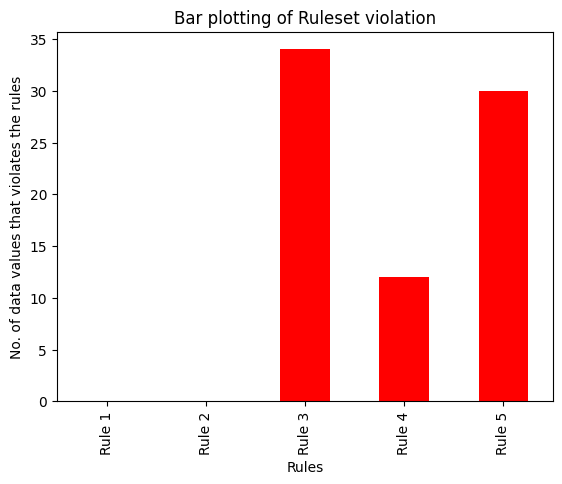

In [24]:
import matplotlib.pyplot as plt
set.plot(kind='bar', color = ["red"])
plt.title("Bar plotting of Ruleset violation")
plt.xlabel("Rules")
plt.ylabel("No. of data values that violates the rules")
plt.show()

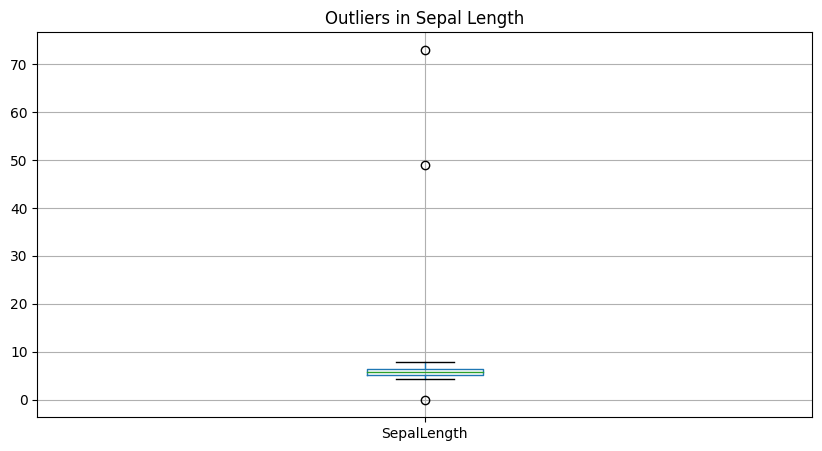

In [26]:
# v) Find outliers in sepal length using boxplot and boxplot.stats

plt.figure(figsize =(10,5))
df.boxplot(column="SepalLength")
plt.title("Outliers in Sepal Length")
plt.show()